___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://miro.medium.com/max/1400/1*ZFuMI_HrI3jt2Wlay73IUQ.png" width="350px" height="180px" />


# <font color= #8A0829> Data modeling lab </font>
- <Strong> Teacher: Sara Eugenia Rodríguez </Strong>
- <Strong> Year </Strong>: 2023



<p style="text-align:right;"> Image from: https://miro.medium.com/max/1400/1*ZFuMI_HrI3jt2Wlay73IUQ.png</p>

### <font color= #2E9AFE> Tree based models II</font>

### Random forests

Steps to create a random forest:
- Create a bootstrapped dataset
- Use bootstrapped dataset using a subset of variables(columns) in each step
- Get back to step 1 and repeat

Because of bootstrapping, test-split is not neccesary. It's recommended only when comparing to other models

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import time


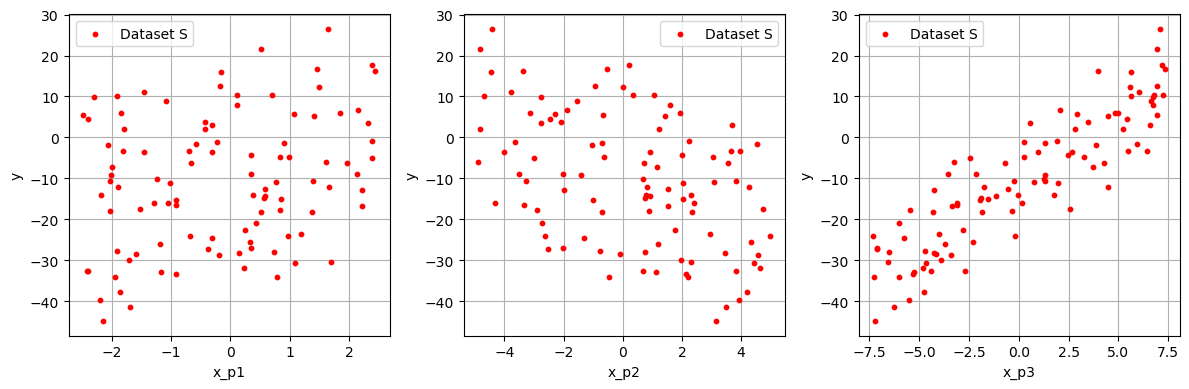

In [2]:
#Generate data
rng = np.random.RandomState(0)

# #############################################################################
X = np.zeros((100,3))
X[:,0] = 5 * rng.rand(100, 1)[:,0]-2.5
X[:,1] = 10 * rng.rand(100, 1)[:,0]-5
X[:,2] = 15 * rng.rand(100, 1)[:,0]-7.5

y = np.ravel(3*X[:,0]-2*X[:,1]+3*X[:,2]-10)
# Add noise to targets
yrnd = y + 3 * (0.5 - rng.rand(y.shape[0]))


plt.figure(figsize=(12,4))
plt.subplot(131)
plt.scatter(X[:,0], yrnd, c='r', s=10, label='Dataset S',zorder=2)
plt.xlabel('x_p1')
plt.ylabel('y')
plt.legend()
plt.grid()

plt.subplot(132)
plt.scatter(X[:,1], yrnd, c='r', s=10, label='Dataset S',zorder=2)
plt.xlabel('x_p2')
plt.ylabel('y')
plt.legend()
plt.grid()

plt.subplot(133)
plt.scatter(X[:,2], yrnd, c='r', s=10, label='Dataset S',zorder=2)
plt.xlabel('x_p3')
plt.ylabel('y')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [3]:
#train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, yrnd, test_size=0.20,
                                                    random_state=0,
                                                    shuffle=True)

--- 0.03890585899353027 seconds ---
R2 = 0.9418


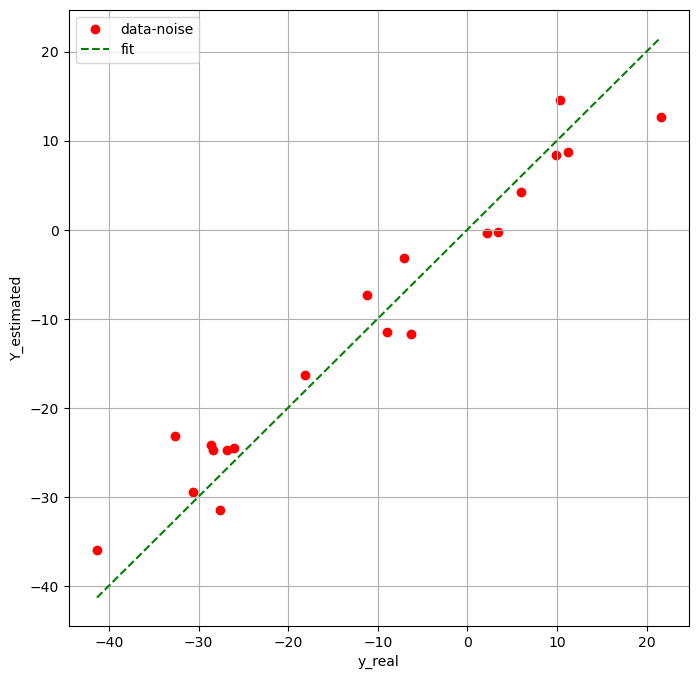

In [4]:


#model
model = RandomForestRegressor(n_estimators=100,#how many trees do we want
                               criterion='squared_error', 
                               max_depth=None, # if None, tree will go to max depth and be overfitted 
                               min_samples_split=2, #Minimum records to make a split 
                               min_samples_leaf=2, #Minimun records in final leaf 
                               bootstrap=True, #¿bootstrapping?
                               oob_score=False, 
                               random_state=0, #seed
                               verbose=0)
#Calculating how much it takes
start_time = time.time()

#Fitting the model
model = model.fit(X_train,y_train) 
print("--- %s seconds ---" % (time.time() - start_time))

#Predicting
Yhat = model.predict(X_test)
print('R2 = %0.4f'%model.score(X_test,y_test))

plt.figure(figsize=(8,8))
plt.scatter(y_test,Yhat,c='r',label='data-noise')
plt.plot(np.linspace(min(y_test),max(y_test),100),np.linspace(min(y_test),max(y_test),100),'g--',label='fit')
plt.xlabel('y_real')
plt.ylabel('Y_estimated')
plt.grid()
plt.legend()
plt.show()

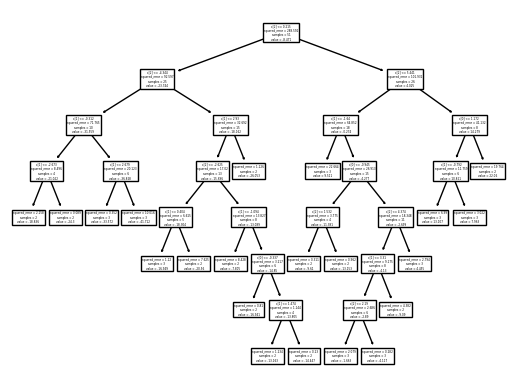

In [5]:
# if i wanted to see just one tree
from sklearn import tree
tree.plot_tree(model.estimators_[0]) ;

In [6]:
#Croos validation and grid search
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor(criterion='squared_error',
                               min_samples_leaf=2,
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=0)

gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 11), 
                                'min_samples_split': range(10, 60, 10),
                                'n_estimators': range(1,100,10)}, # número de árboles en el bosque
                  cv=2,
                  scoring='neg_mean_squared_error')
#Training
gs.fit(X_train, y_train)



GridSearchCV(cv=2,
             estimator=RandomForestRegressor(min_samples_leaf=2,
                                             random_state=0),
             param_grid={'max_depth': range(1, 11),
                         'min_samples_split': range(10, 60, 10),
                         'n_estimators': range(1, 100, 10)},
             scoring='neg_mean_squared_error')

In [7]:
#Getting optimal parameters
print(gs.best_params_)

{'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 91}


In [8]:
#Model with optimal parameters
new_model = RandomForestRegressor(n_estimators=91,
                               criterion='squared_error',
                               max_depth=10,
                               min_samples_split=10,
                               min_samples_leaf=1,
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=0)
#Training
new_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=91,
                      random_state=0)

In [9]:
from sklearn.metrics import r2_score
yhat = new_model.predict(X_test)
R2_score = r2_score(y_test,yhat)
print('R2:', R2_score)

R2: 0.9226936628994558


In [10]:
from sklearn.metrics import mean_squared_error
MSE_score = mean_squared_error(y_test,yhat)
print('MSE:', MSE_score)

MSE: 24.516745433408655


In [11]:
#Most important model variables
new_model.feature_importances_

array([0.04910776, 0.07299357, 0.87789867])

<Axes: >

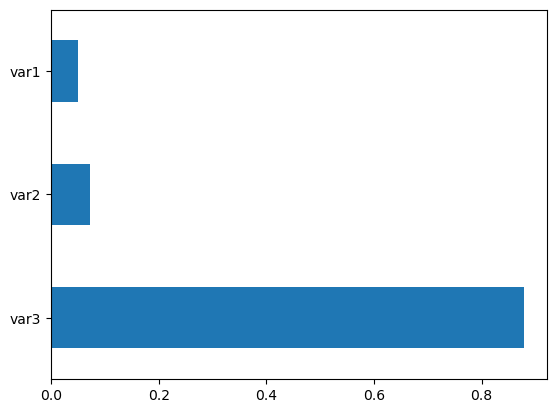

In [12]:
import pandas as pd
cols=['var1','var2','var3']
(pd.Series(new_model.feature_importances_, index=cols)
   .nlargest(3)
   .plot(kind='barh')) 

**Advantages**


- Great when generalizing
- Avoid overfitting because of bootstrapping
- Reduce variance and increase performance
- Work great with categorical and continiuos variables
- Don't require scaling
- Easily manage null values
- Don't get affected by outliers
- Pretty stable models

**Disadvantages**

- Computationally complex because of the several trees  created
- Long training process